<br><br><center><h1 style="font-size:3em;color:#2467C0">Coursework: Used Car Price Prediction</h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="https://miro.medium.com/max/3544/1*ftnM93QhlS0A7I55QegbrA.jpeg" align="middle" style="width:550px;height:360px;"/></td>
<td style="text-align:justify;font-size:1.2em">
In this project, we will be using an open dataset from the <a href="https://www.kaggle.com">Kaggle</a> website. This <a href="https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes">UK Used Car Dataset</a> contains data of around 100,000 used cars sold in the UK. 
<br>
<br>
The dataset has columns listing price, brand, model, year, mileage, mpg, transmission type, fuel type and  engine size.  
<br>
<br>
The goal of this project is to use the previous data and build a model that efficiently predicts the price of a car by using data of cars previously sold in the market.

<br>
<br>
Let's start writing the code
</td>
</tr>
</table>

## Getting Started
<br> First of all, I:
<ol>
<li>Downloaded the data from: <a href="https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes">https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes</a></li>
<li>Extracted the zip file</li>
<li>Moved the extracted files to the coursework folder</li>
</ol>

<h1 style="font-size:2em;color:#2467C0">Acquire Data</h1>


## Import Libraries
<br> Now I will import Python libraries that will be used in this project. These libraries are:
<ul>
<li><b>sqllite3</b> to interact with a local relational database</li>
<li><b>pandas</b> and <b>numpy</b> for data ingestion and manipulation.</li>
<li><b>matplotlib</b> and <b>seaborn</b> for data visualization</li>
<li><b>sklearn</b> for accessing Machine Learning algorithms</li>
<li><b>Ipywidgets</b> for interactive feature</li>
</ul>

In [1]:
import sqlite3
import pandas as pd 
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from IPython.display import display
import ipywidgets as widgets

## Import Dataset
We will import datasets for different brands of car

In [2]:
df1 = pd.read_csv('audi.csv')
df2 = pd.read_csv('bmw.csv')
df3 = pd.read_csv('ford.csv')
df4 = pd.read_csv('hyundi.csv')
df5 = pd.read_csv('merc.csv')
df6 = pd.read_csv('skoda.csv')
df7 = pd.read_csv('toyota.csv')
df8 = pd.read_csv('vauxhall.csv')
df9 = pd.read_csv('vw.csv')

Now print the columns in each dataframes to combine them in a meaningful way

In [3]:
print("List of Columns in Audi dataframe:") 
print(list(df1.columns))
print("-" *90)

print("List of Columns in BMW dataframe:") 
print(list(df2.columns))
print("-" *90)

print("List of Columns in Ford dataframe:") 
print(list(df3.columns))
print("-" *90)

print("List of Columns in Hyundi dataframe:") 
print(list(df4.columns))
print("-" *90)

print("List of Columns in Mercedes dataframe:") 
print(list(df5.columns))
print("-" *90)

print("List of Columns in Skoda dataframe:") 
print(list(df6.columns))
print("-" *90)

print("List of Columns in Toyota dataframe:") 
print(list(df7.columns))
print("-" *90)

print("List of Columns in Vauxhall dataframe:") 
print(list(df8.columns))
print("-" *90)

print("List of Columns in VW dataframe:") 
print(list(df9.columns))
print("-" *90)


List of Columns in Audi dataframe:
['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
------------------------------------------------------------------------------------------
List of Columns in BMW dataframe:
['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
------------------------------------------------------------------------------------------
List of Columns in Ford dataframe:
['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
------------------------------------------------------------------------------------------
List of Columns in Hyundi dataframe:
['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax(£)', 'mpg', 'engineSize']
------------------------------------------------------------------------------------------
List of Columns in Mercedes dataframe:
['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg

### Column details
<br> Below are the details of each column used in this dataset</br>
<ul>
<li><b>model :</b> Model of the vehicle</li>
<li><b>year :</b> Manufacturing year of vehicle</li>
<li><b>price :</b> Price of vehicle in Pounds)</li>
<li><b>Transmission :</b> Type of gears in vehicle</li>
<li><b>milage :</b> Mileage of vehicle</li>
<li><b>fuelType :</b> Fuel type of vehicle</li>
<li><b>tax :</b> Road tax paid for vehicle</li>
<li><b>mpg :</b> Miles per gallon of vehicle</li>
<li><b>engine size :</b> Engine size of vehicle</li>

The columns in each dataframe are the same except the tax column in Hyundi which has £ sign with it.

Let us rename it same as columns in other brands.

In [4]:
df4 = df4.rename(columns={'tax(£)': 'tax'})

## Adding brand column 
The columns in each dataframe are now the same hence we can combine them togather after adding an extra column containing brand name in each dataframe

In [5]:
df1.insert(0, 'brand', 'audi')
df2.insert(0, 'brand', 'bmw')
df3.insert(0, 'brand', 'ford')
df4.insert(0, 'brand', 'hyundi')
df5.insert(0, 'brand', 'mercedes')
df6.insert(0, 'brand', 'skoda')
df7.insert(0, 'brand', 'toyota')
df8.insert(0, 'brand', 'vauxhall')
df9.insert(0, 'brand', 'volkswagen')

## Combine Dataframes
We have different dataframes for each brand. It is better to convert them into single datafame because it is easy to handle one dataframe.

In [6]:
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9]
df = pd.concat(frames)

<h1 style="font-size:2em;color:#2467C0">Prepare data</h1>

### Understanding the data
Now let's check the shape of dataframe

In [7]:
df.shape

(99187, 10)

We can notice that the dataframe has around 99k rows and 10 columns informing that we have data of around 99k cars

Now let's have a look at the dataframe head in order to find out the datatypes.

In [8]:
df.head()

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,audi,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,audi,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,audi,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,audi,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,audi,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


Notice that the Model transmission and fuelType variables are stored in object format. To use them in machine learning algorithm we have to use different dummy variables which we will do later on in the project. 

We will save the dataframe values to another dataframe in order to keep old column names which we will need while creating user interface.

In [9]:
dff = df

Let's see if there are any columns with missing values

In [10]:
df.isnull().sum()

brand           0
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

We do not have any missing values. 

Now let us analyse the data in order to make decisions to clean it

In [11]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000
mean,2017.087723,16805.347656,23058.914213,120.299838,55.166825,1.663280
std,2.123934,9866.773417,21148.523721,63.150926,16.138522,0.557646
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,9999.000000,7425.000000,125.000000,47.100000,1.200000
50%,2017.000000,14495.000000,17460.000000,145.000000,54.300000,1.600000
75%,2019.000000,20870.000000,32339.000000,145.000000,62.800000,2.000000
max,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


The above data gives us information about each columns data. Let us analyse the data in each columns one by one.

### Year
From the above data, we can see that the maximum year value is 2060 which is clearly a mistake. The minimum value of 1970 is not true either. 

Let's see how many vehicles are there which have year greater than 2020 and less than 1990

In [12]:
df[(df['year'] > 2020) | (df['year'] < 1990)]

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
17726,ford,Fiesta,2060,6495,Automatic,54807,Petrol,205,42.8,1.4
12072,mercedes,M Class,1970,24999,Automatic,14000,Diesel,305,39.2,0.0
10837,vauxhall,Zafira,1970,10495,Manual,37357,Petrol,200,42.2,1.4


There are three cars in the dataset. Let's remove this data from the dataset 

In [13]:
df = df.drop(df[(df['year'] > 2020) | (df['year'] < 1990)].index)

### Mileage
From the above data, we can see that there are some vehicles which have really less mileage which is not possible. Let's see how many vehicles are older than 2020 and have mileage less than 25 miles.

In [14]:
df[(df['mileage'] <= 25) & (df['year']< 2020)]

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
207,audi,A5,2019,28985,Automatic,18,Petrol,145,39.8,2.0
221,audi,Q7,2019,49985,Automatic,10,Diesel,145,33.2,3.0
222,audi,Q7,2019,59995,Automatic,10,Diesel,145,33.2,3.0
229,audi,Q3,2019,34985,Automatic,10,Diesel,145,47.1,2.0
230,audi,A5,2019,29985,Automatic,10,Diesel,145,51.4,2.0
...,...,...,...,...,...,...,...,...,...,...
14673,volkswagen,Golf SV,2019,19999,Automatic,10,Petrol,145,42.8,1.5
14828,volkswagen,Amarok,2019,28995,Automatic,10,Diesel,260,28.3,3.0
14835,volkswagen,Tiguan Allspace,2019,30785,Semi-Auto,10,Petrol,145,35.8,1.5
14848,volkswagen,Tiguan Allspace,2019,28995,Semi-Auto,19,Diesel,145,44.1,2.0


We have quite a few older vehicles with less mileage, now We will drop them. Although some of the vehicles might have been correctly listed yet removing a small portion of data would not affect the overall dataframe. 

In [15]:
df= df.drop(df[(df['mileage'] <= 25) & (df['year']< 2020)].index)

### Tax
From the above data, we can see that there are some vehicles which have zero tax. It is impossible for vehicles with petrol fuel type and model later than 2017 to have zero road tax. Let's see how many vehicles are there with zero tax

In [16]:
df[(df['tax'] == 0) & (df['year']> 2017)]

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
15600,ford,Fiesta,2018,12300,Manual,20536,Petrol,0,69.0,1.0
3926,vauxhall,Astra,2018,10998,Manual,17863,Petrol,0,74.3,1.4


Let's remove these values from dataset

In [17]:
df = df.drop(df[(df['tax'] == 0) & (df['year']> 2017)].index)

### mpg
From the above data, we can see that there are some vehicles which have really low  mpg which is impossible. Let's see how many vehicles are there with unrealistic mpg

We have many vehicles with less mpg, now We will drop them

In [19]:
df = df.drop(df[(df['mpg'] <= 10)].index)

### Engine size
From the above data, we can see that there are some vehicles which have 0 or unrealistic engine size which is not possible.
Let's see how many vehicles are there with unreal engine size

In [20]:
df[df['engineSize'] <1]

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
7505,audi,Q5,2019,44790,Automatic,5886,Petrol,135,117.7,0.0
7506,audi,Q3,2019,32788,Automatic,1500,Diesel,145,47.1,0.0
7516,audi,Q3,2020,29944,Manual,1500,Petrol,145,40.9,0.0
7517,audi,Q3,2020,33333,Automatic,1500,Diesel,145,47.1,0.0
7518,audi,Q3,2020,29944,Automatic,1500,Petrol,145,32.5,0.0
...,...,...,...,...,...,...,...,...,...,...
11648,volkswagen,Tiguan,2016,15300,Manual,38398,Diesel,145,53.3,0.0
11655,volkswagen,Tiguan,2018,24000,Automatic,22200,Diesel,145,47.9,0.0
12821,volkswagen,Up,2017,8500,Manual,20324,Petrol,20,64.2,0.0
12879,volkswagen,Up,2017,8000,Manual,24444,Petrol,20,60.1,0.0


We have 264 vehicles with unrealistic engine size, now we will drop the values from the dataset.

In [21]:
df = df.drop(df[df['engineSize']<1].index)

<h1 style="font-size:2em;color:#2467C0">Data Visualisation</h1>

### Correlation of numerical variables
Now we will make a comparison of all variables with numerical datatype and find out their effect on each other

Text(0.5, 1.0, 'Correlation of different attributes')

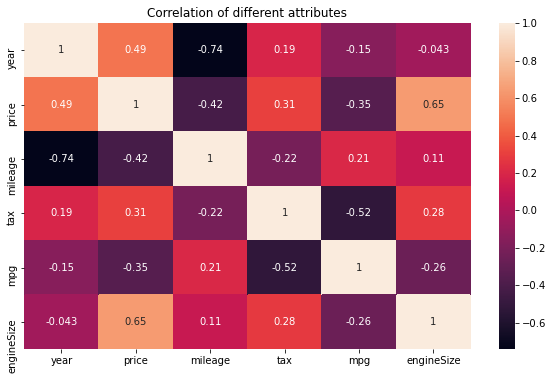

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation of different attributes')

We can see that the engine size has a great effect on price of a car. The mileaage and year also affect the price of car. The negative correlation value of price and mileage indicates that price goes down as mileage increases. The tax and mpg not greatly affect the price but still has impact on price change. 

### Year vs Price
Now we will individually analyse the impact of registered year on price.

Text(0.5, 1.0, 'Mileage vs Price')

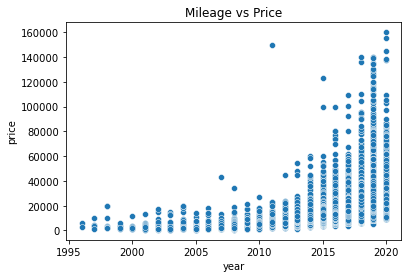

In [24]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='year', y='price',data=df)
plt.title('Mileage vs Price')

We can see from the graph that the price of a car decreases as the car gets older which is obvious as newer cars are more likely to sell for better price.

There is one car which is older than 2012 and has a really high price, let us analyse that data. 

In [25]:
df[(df['year'] < 2012) & (df['price'] > 120000)]

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
5,mercedes,SL CLASS,2011,149948,Automatic,3000,Petrol,570,21.4,6.2


This high price seems unrealistic for a 2011 model car. Let's get rid of this data from out data frame

In [26]:
df = df.drop(df[(df['year'] < 2012) & (df['price'] > 120000)].index)

### Mileage vs Price
Now We will find the impact of mileage on price of vehicle

Text(0.5, 1.0, 'Mileage vs Price')

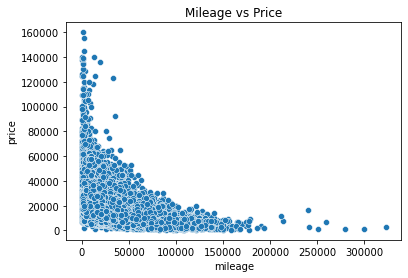

In [27]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='mileage', y='price',data=df)
plt.title('Mileage vs Price')

We can see from the graph that the price of a car decreases as mileage increases. 

### Engine Size vs Price
Now We will find the impact of engine size on price of vehicle

Text(0.5, 1.0, 'Engine Size vs Price')

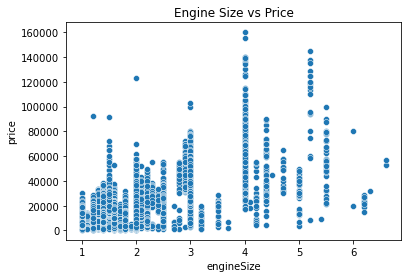

In [28]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='engineSize',y='price',data=df)
plt.title('Engine Size vs Price')

We can see from the graph that the price of vehical tend to increase as the engine size increases. There are some cars with low engine size and very high price, we will make decision about them while analysing the brand and models. s

### Brand vs Price
Now We will analyse the price range of different brands

Text(0.5, 1.0, 'Brand vs Price')

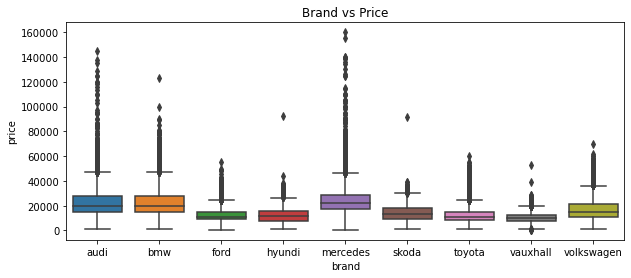

In [29]:
plt.figure(figsize=(10,4))
sns.boxplot(x='brand',y='price',data=df)
plt.title('Brand vs Price')

From the above graph, we can see that Hyundi, Skoda, Toyota and vauxhall are low price range cars compared to bmw, audi and mercedes. 
We noticed that there are some price values around 90k for hyuni and skoda which are unreal.
Let us analyse them prices


In [30]:
df[((df['brand'] == 'hyundi') | (df['brand'] == 'skoda')) & (df['price']> 75000)]

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
4247,hyundi,I10,2017,92000,Automatic,35460,Petrol,150,47.9,1.2
4993,skoda,Karoq,2019,91874,Automatic,3764,Petrol,145,40.9,1.5


These prices for hyundi and skoda must be an error.

Let us remove this data from our dataset

In [31]:
df = df.drop(df[((df['brand'] == 'hyundi') | (df['brand'] == 'skoda')) & (df['price']> 75000)].index)

### Models vs Price
Now let us analyse the prices of different brands depending on model one by one
#### Audi Models
Let us analyse the Audi Models

Text(0.5, 1.0, 'Model vs Price')

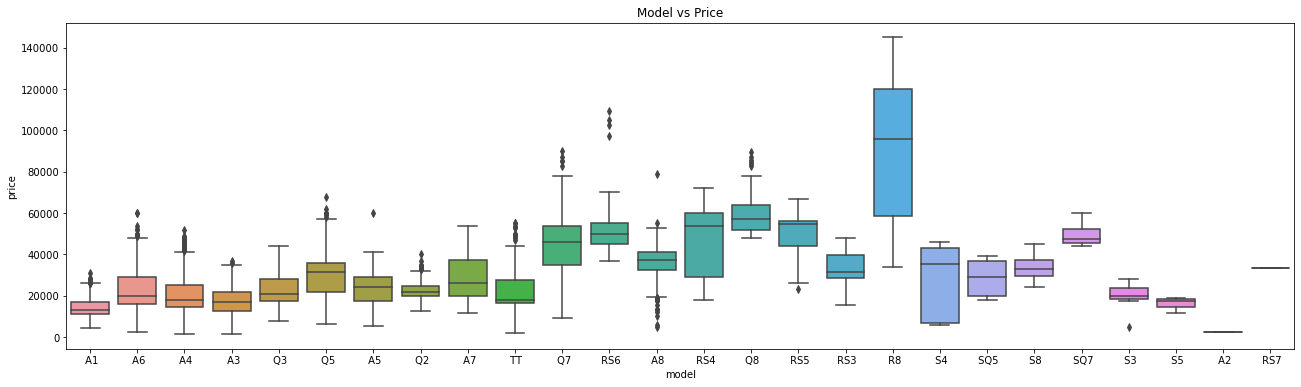

In [32]:
plt.figure(figsize=(22,6))
sns.boxplot(x='model',y='price',data=df[(df['brand'] == 'audi')])
plt.title('Model vs Price')

There is a car Audi A5 which has price of around 60k which is close to brand new car and Audi S3 has a price around 5k which seems too less. 
Let us analyse the two cars 

In [33]:
df[(df['model'] == ' A5') & (df['price']> 50000)  | (df['model'] == ' A8') & (df['price']> 70000)]

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
7221,audi,A5,2020,59995,Semi-Auto,2000,Diesel,150,40.9,3.0
9434,audi,A8,2020,78990,Automatic,250,Diesel,145,39.2,3.0


This is a latest 2020 make car hence high price is possible

In [34]:
df[(df['model'] == ' S3') & (df['price']< 15000)]

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10109,audi,S3,2003,4990,Manual,106000,Petrol,325,39.8,1.8


This is an old car i.e. 2003 make, hence low price is possible

#### BMW Models
Let us analyse the BMW Models

Text(0.5, 1.0, 'Model vs Price')

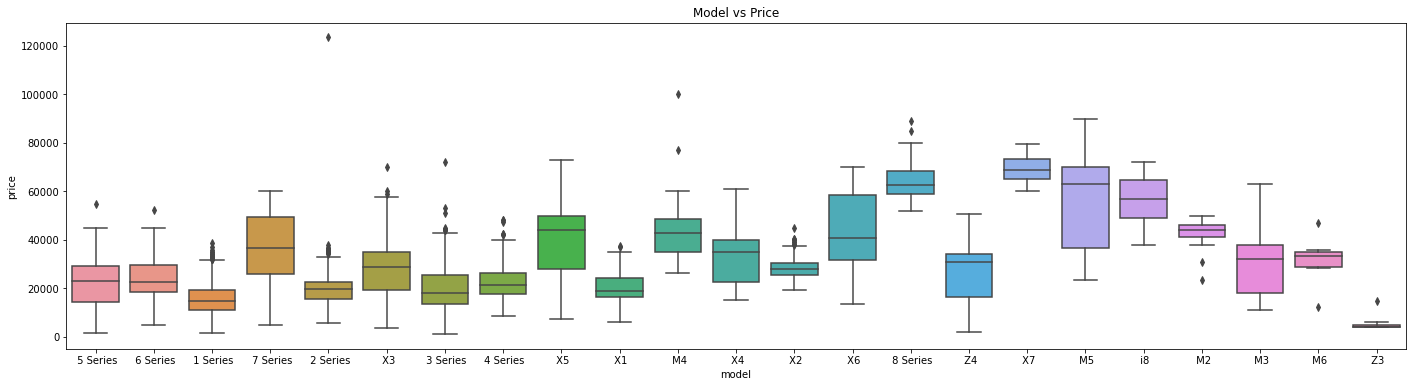

In [35]:
plt.figure(figsize=(24,6))
sns.boxplot(x='model',y='price',data=df[(df['brand'] == 'bmw')])
plt.title('Model vs Price')

There is a 2 Series BMW car worth 120k which is not possible. let us analyse it

In [36]:
df[(df['model'] == ' 2 Series') & (df['price']> 100000)]

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
3638,bmw,2 Series,2015,123456,Semi-Auto,33419,Diesel,20,68.9,2.0


This price is not possible for this model of car, hence let us remove it from dataframe

In [37]:
df = df.drop(df[(df['model'] == ' 2 Series') & (df['price']> 100000)].index)

There is M4 model BMW car worth above 80k. let us analyse and remove it from data frame

In [38]:
df[(df['model'] == ' M4') & (df['price']> 80000)]

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
5362,bmw,M4,2016,99950,Automatic,771,Petrol,300,33.2,3.0


In [39]:
df = df.drop(df[(df['model'] == ' M4') & (df['price']> 80000)].index)

#### Ford Models
Let us analyse the Ford Models

Text(0.5, 1.0, 'Model vs Price')

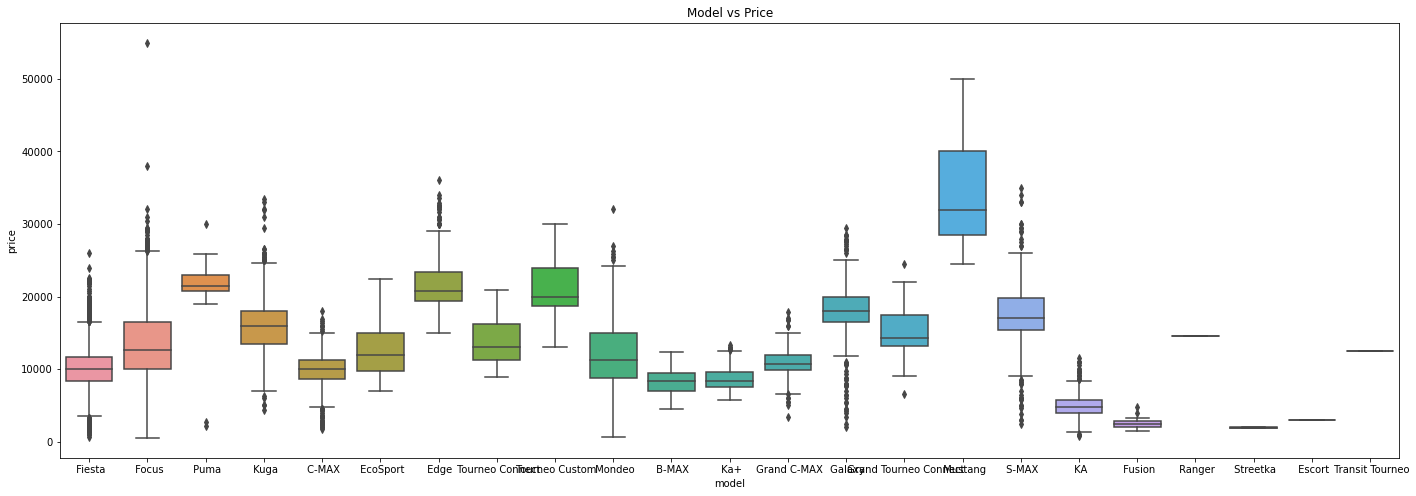

In [40]:
plt.figure(figsize=(24,8))
sns.boxplot(x='model',y='price',data=df[(df['brand'] == 'ford')])
plt.title('Model vs Price')

There is a Focus model car having price of above 50k. Another Puma model car having price less than 5k can be seen.

Let us analyse these cars

In [41]:
df[(df['model'] == ' Puma') & (df['price']< 10000)]

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
16899,ford,Puma,2002,2195,Manual,108000,Petrol,230,38.2,1.7
16900,ford,Puma,2002,2695,Manual,69000,Petrol,220,38.7,1.6


Since these cars are really old, it is possible for them to have such a low price. Hence we will keep the data

Now lets analyse the other model

In [42]:
df[(df['model'] == ' Focus') & (df['price']> 50000)]

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
11912,ford,Focus,2018,54995,Manual,11000,Petrol,145,36.7,2.3


This high price is not possible for this car hence we will discard it from dataset

In [43]:
df = df.drop(df[(df['model'] == ' Focus') & (df['price']> 50000)].index)

#### Hyundi Models
Let us analyse the Hyundi Models

Text(0.5, 1.0, 'Model vs Price')

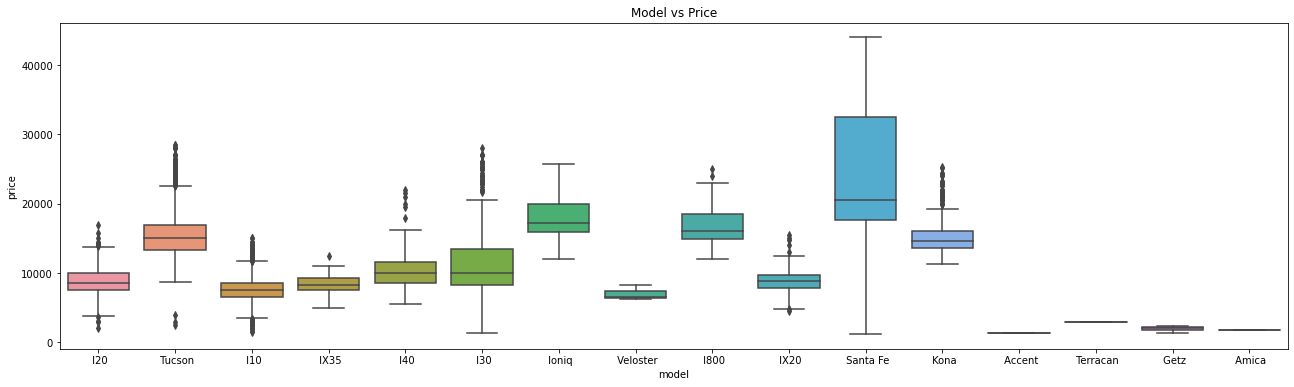

In [44]:
plt.figure(figsize=(22,6))
sns.boxplot(x='model',y='price',data=df[(df['brand'] == 'hyundi')])
plt.title('Model vs Price')

There is no unrealistic data. Let's move on to next model

#### Mercedes Models
Let us analyse the Mercedes Models

Text(0.5, 1.0, 'Model vs Price')

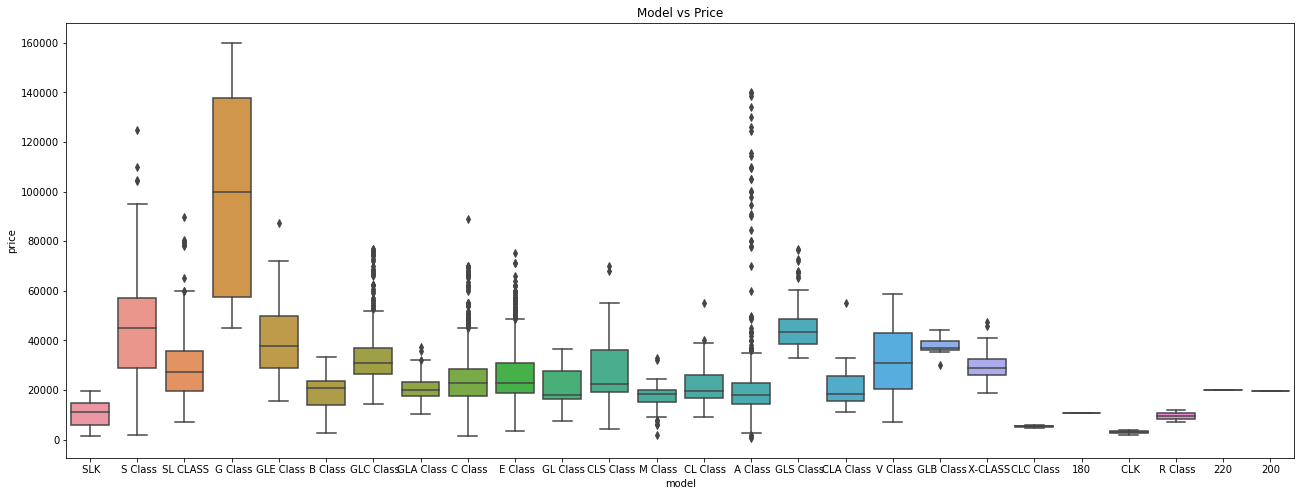

In [45]:
plt.figure(figsize=(22,8))
sns.boxplot(x='model',y='price',data=df[(df['brand'] == 'mercedes')])
plt.title('Model vs Price')

Although there are some values which are above and below average but there is no unrealistic data for this brand

#### Skoda Models
Let us analyse the Skoda Models

Text(0.5, 1.0, 'Model vs Price')

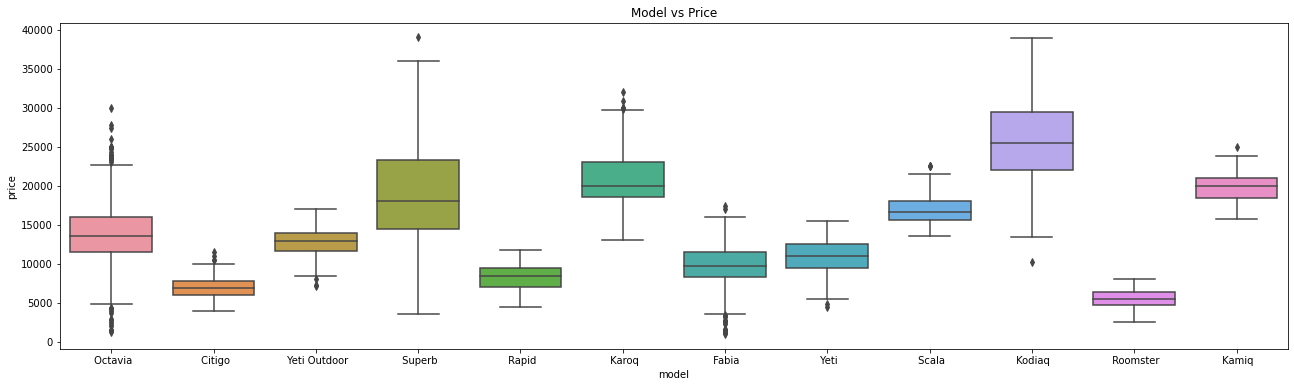

In [46]:
plt.figure(figsize=(22,6))
sns.boxplot(x='model',y='price',data=df[(df['brand'] == 'skoda')])
plt.title('Model vs Price')

The data for this brand is fine, we do not need to discard anything from here

#### Toyota Models
Let us analyse the Toyota Models

Text(0.5, 1.0, 'Model vs Price')

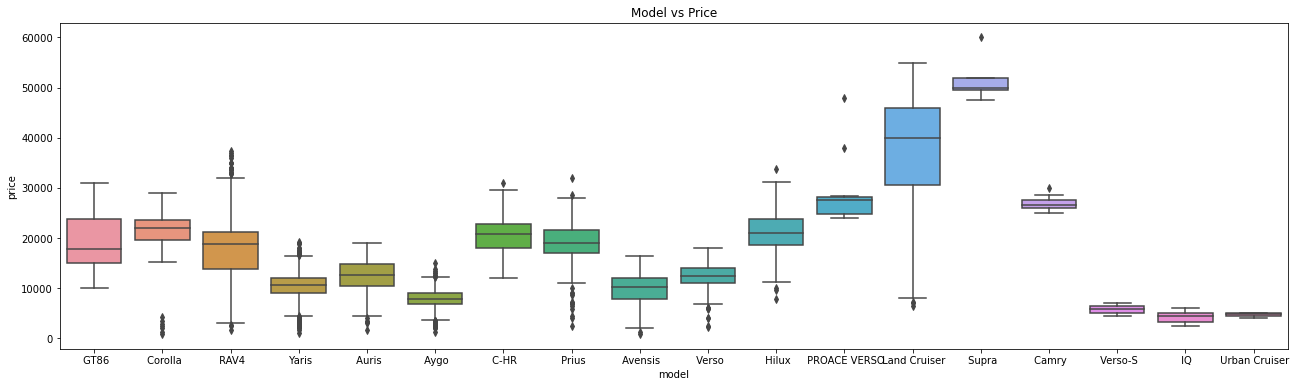

In [47]:
plt.figure(figsize=(22,6))
sns.boxplot(x='model',y='price',data=df[(df['brand'] == 'toyota')])
plt.title('Model vs Price')

This data is realistic, moving on to next brand

#### Vauxhall Models
Let us analyse the Vauxhall Models

Text(0.5, 1.0, 'Model vs Price')

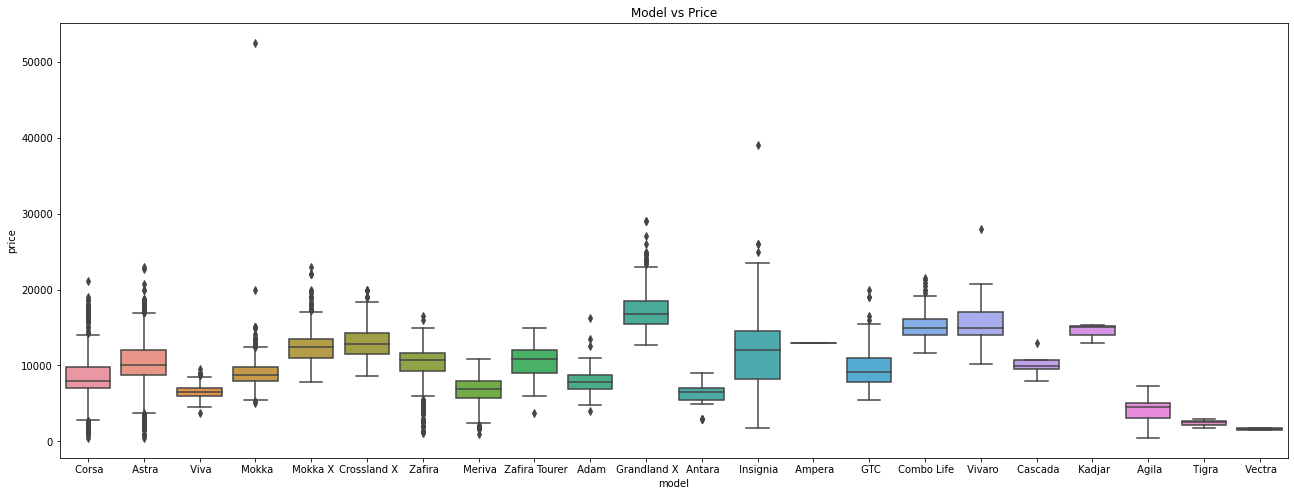

In [48]:
plt.figure(figsize=(22,8))
sns.boxplot(x='model',y='price',data=df[(df['brand'] == 'vauxhall')])
plt.title('Model vs Price')

There is a Viva model car having price above 50k which is unrealistic, also an insignia brand car having price around 50k is unrealistic too. Let's remove these values from dataset

In [49]:
df = df.drop(df[(df['model'] == ' Mokka') & (df['price']> 50000) | (df['model'] == ' Insignia') & (df['price']> 30000)].index)

#### Volkswagon Models
Let us analyse the Volkswagon Models

Text(0.5, 1.0, 'Model vs Price')

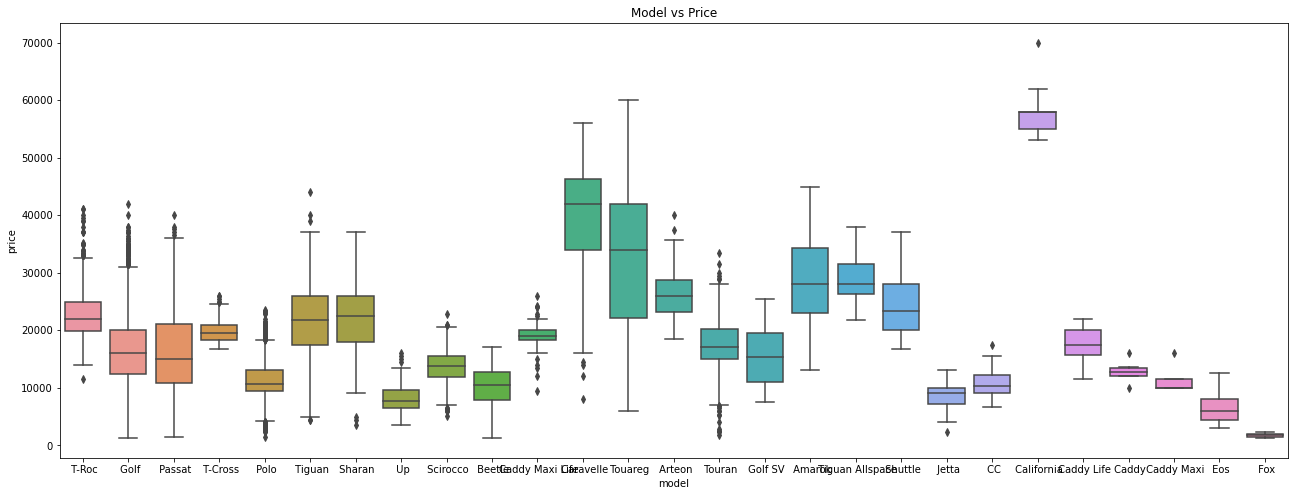

In [50]:
plt.figure(figsize=(22,8))
sns.boxplot(x='model',y='price',data=df[(df['brand'] == 'volkswagen')])
plt.title('Model vs Price')

There prices seem real hence we will keep this data

### Fuel Type vs Price
Now let us analyse the prices dependig on engine size

Text(0.5, 1.0, 'Engine Size vs Price')

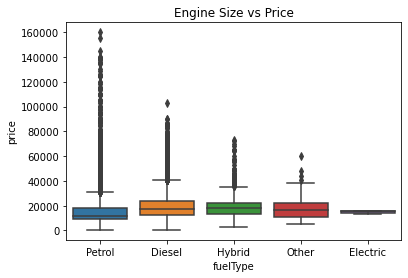

In [51]:
plt.figure(figsize=(6,4))
sns.boxplot(x='fuelType',y='price',data=df)
plt.title('Engine Size vs Price')

### Transmission vs Price
Now let us analyse the prices dependig on transmission

Text(0.5, 1.0, 'Transmission vs Price')

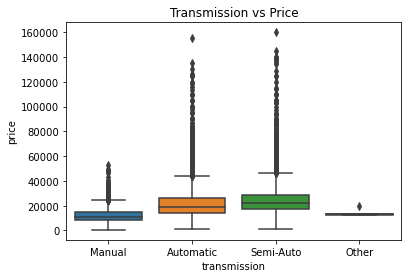

In [52]:
plt.figure(figsize=(6,4))
sns.boxplot(x='transmission',y='price',data=df)
plt.title('Transmission vs Price')

We have four columns i.e brand, model, fuelType and transmission which contain categorical values. To use them in machine learning algorithm, we need to convert them into a meaningful form.

In [53]:
df = pd.get_dummies(df, columns=["brand"], prefix=['Brand_is'])
df = pd.get_dummies(df, columns=["model"], prefix=['Model_is'] )
df = pd.get_dummies(df, columns=["fuelType"], prefix=['Fuel_is'])
df = pd.get_dummies(df, columns=["transmission"], prefix=['Transmission_is'])

Let us have a look at the dataframe now

In [54]:
df

,year,price,mileage,tax,mpg,engineSize,Brand_is_audi,Brand_is_bmw,Brand_is_ford,Brand_is_hyundi,...,Model_is_220,Fuel_is_Diesel,Fuel_is_Electric,Fuel_is_Hybrid,Fuel_is_Other,Fuel_is_Petrol,Transmission_is_Automatic,Transmission_is_Manual,Transmission_is_Other,Transmission_is_Semi-Auto
0,2017,12500,15735,150,55.4,1.4,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,2016,16500,36203,20,64.2,2.0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,2016,11000,29946,30,55.4,1.4,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,2017,16800,25952,145,67.3,2.0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,2019,17300,1998,145,49.6,1.0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15152,2012,5990,74000,125,58.9,2.0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
15153,2008,1799,88102,145,46.3,1.2,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
15154,2009,1590,70000,200,42.0,1.4,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
15155,2006,1250,82704,150,46.3,1.2,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


<h1 style="font-size:2em;color:#2467C0">Analyse Data</h1>


### Declaring the Columns we Want to Use as Features

Now we wil select the columns that we need to create the model. All the variables in the dataset are useful hence we will keep all of them except price. 

let us drop price column

In [55]:
features = df.drop(columns=['price'])

In [56]:
features

,year,mileage,tax,mpg,engineSize,Brand_is_audi,Brand_is_bmw,Brand_is_ford,Brand_is_hyundi,Brand_is_mercedes,...,Model_is_220,Fuel_is_Diesel,Fuel_is_Electric,Fuel_is_Hybrid,Fuel_is_Other,Fuel_is_Petrol,Transmission_is_Automatic,Transmission_is_Manual,Transmission_is_Other,Transmission_is_Semi-Auto
0,2017,15735,150,55.4,1.4,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,2016,36203,20,64.2,2.0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,2016,29946,30,55.4,1.4,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,2017,25952,145,67.3,2.0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,2019,1998,145,49.6,1.0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15152,2012,74000,125,58.9,2.0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
15153,2008,88102,145,46.3,1.2,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
15154,2009,70000,200,42.0,1.4,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
15155,2006,82704,150,46.3,1.2,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


### Specify the Prediction Target
Now we will specify the target we need to achieve.
In our case the target is price

In [57]:
target = ['price']

### Clean the Data
Now we will delete the columns containing empty values

In [58]:
df = df.dropna()

In [59]:
df

,year,price,mileage,tax,mpg,engineSize,Brand_is_audi,Brand_is_bmw,Brand_is_ford,Brand_is_hyundi,...,Model_is_220,Fuel_is_Diesel,Fuel_is_Electric,Fuel_is_Hybrid,Fuel_is_Other,Fuel_is_Petrol,Transmission_is_Automatic,Transmission_is_Manual,Transmission_is_Other,Transmission_is_Semi-Auto
0,2017,12500,15735,150,55.4,1.4,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,2016,16500,36203,20,64.2,2.0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,2016,11000,29946,30,55.4,1.4,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,2017,16800,25952,145,67.3,2.0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,2019,17300,1998,145,49.6,1.0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15152,2012,5990,74000,125,58.9,2.0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
15153,2008,1799,88102,145,46.3,1.2,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
15154,2009,1590,70000,200,42.0,1.4,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
15155,2006,1250,82704,150,46.3,1.2,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


### Extract Features and Target ('price') Values into Separate Dataframes
No we will extract the features and target into a separate dataframes in order to create a model

In [60]:
X = features

In [61]:
y = df[target]

Let us also display our target values: 

In [62]:
y

,price
0,12500
1,16500
2,11000
3,16800
4,17300
...,...
15152,5990
15153,1799
15154,1590
15155,1250


### Split the Dataset into Training and Test Datasets
Now we will split our dataset into training and test dataset. Since more training data results in better solution, we will keep training size of 80% and test size of 20%. Since we have a huge dataset, it a little change in training and test dataset will not greatly affect the model results. We will keep random size of zero so that it gives the same output no matter how many times the model is run. 

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8 , random_state=0)

## (1) Linear Regression
### Make Regressor Model
Now we will make a linear regressor model. Initially we will fit our model to the training set

In [64]:
l_regressor = LinearRegression()
l_regressor.fit(X_train, y_train)

LinearRegression()

### Perform Prediction using Random Forest Regression
Now we will perform pridictions on our model

In [65]:
y_prediction = l_regressor.predict(X_test)
y_prediction

array([[24974.64962846],
       [18445.08448952],
       [ 5194.59945399],
       ...,
       [ 7291.38422971],
       [11531.95959162],
       [16656.20070908]])

### Find out the accuracy of model
Now we will calculate the accuracy by which our model is created.

In [66]:
l_score = l_regressor.score(X_test,y_test)
print('R Square Score for Linear Regression : ', l_score)
l_RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
print('Linear Regression Accuracy using Root Mean Square Error: ', l_RMSE)

R Square Score for Linear Regression :  0.8747705352500285
Linear Regression Accuracy using Root Mean Square Error:  3473.584531104653


### Mean of expected Price
Now we will review the mean of the expected target value in test set when we use Regressor Model


In [67]:
y_test.describe()

,price
count,17868.000000
mean,16669.189893
std,9816.050027
min,850.000000
25%,9995.000000
50%,14299.000000
75%,20500.000000
max,135000.000000


We can see from the above results that the output from Linear Regressor model has $R^2$ score of 0.87 referring that model covers 87% of variance, which is quite good. the Root Mean Square Error value of £3473 is quite large. If we calculate the percentage error by using mean price value, the error is computed to be 21%, stating that this model is 79% accurate. The accuracy value is reasonable. The 21% error might be due to the fact that there are some vehicles which have extremely low and high prices compared to average values, resulting in deviation of model from actual results. 

In [68]:
y_train

,price
7503,31990
7116,38950
10069,14995
11696,17450
4053,21490
...,...
2375,9998
6817,19849
3127,21480
4208,41900


## (2) Decision Tree Regressor
### Make Regressor Model
Now we will make a Decision tree regressor model. Initially we will fit our model to the training set

In [69]:
dt_regressor = DecisionTreeRegressor(max_depth=20)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20)

### Perform Prediction using Decision Tree Regression Model
Now we will perform pridictions on our model

In [70]:
y_prediction = dt_regressor.predict(X_test)
y_prediction

array([19687.        , 15675.        ,  7439.15      , ...,
        7926.40184049, 11175.25      , 16143.18556701])

### Find out the accuracy of model
Now we will calculate the accuracy by which our model is created.

In [71]:
dt_score = dt_regressor.score(X_test,y_test)
print('R Square Score for Linear Regression : ', dt_score)
dt_RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
print('Linear Regression Accuracy using Root Mean Square Error: ', dt_RMSE)

R Square Score for Linear Regression :  0.9430452018302387
Linear Regression Accuracy using Root Mean Square Error:  2342.5548499154534


We can see from the above results that the output from Linear Regressor model has $R^2$ score of 0.94 referring that model covers 94% of variability, which is quite good. the Root Mean Square Error value of £2342 appears large but if we calculate the percentage error by using mean price value, the error is computed to be 14%, stating that this model is 86% accurate. 

## (3) Multilayer Perceptrons Regressor
### Make Regressor Model
Now we will make a multilayer perceptrons regressor model. Initially we will fit our model to the training set

In [72]:
mlp_regressor = MLPRegressor()
mlp_regressor.fit(X_train, y_train)

c:\users\saad\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\saad\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

### Perform Prediction using Multilayer Perceptrons Regression Model
Now we will perform pridictions on our model

In [73]:
y_prediction = mlp_regressor.predict(X_test)

### Find out the accuracy of model
Now we will calculate the accuracy by which our model is created.

In [74]:
mlp_score = mlp_regressor.score(X_test,y_test)
print('R Square Score for Random Forest Regression : ', mlp_score)
mlp_RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
print('Random Forest Regression Accuracy using Root Mean Square Error: ', mlp_RMSE)

R Square Score for Random Forest Regression :  0.8964462418883525
Random Forest Regression Accuracy using Root Mean Square Error:  3158.6939038629644


We can see from the above results that the output from Linear Regressor model has $R^2$ score of about 0.9 referring that model covers 90% variability, which is good. the Root Mean Square Error value of £3158 which seems quite large. If we calculate the percentage error by using mean price value, the error is computed to be 19%, stating that this model is 81% accurate. The accuracy value is reasonable. The 19% error might be due to the fact that there are some vehicles which have extremely low and high prices compared to average values, resulting in deviation of model from actual results. 

## (4) Random Forest Regressor
### Make Regressor Model
Now we will make a Random Forest regressor model. Initially we will fit our model to the training set

In [75]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

<ipython-input-75-aaaa73f2bec1>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


RandomForestRegressor()

### Perform Prediction using Random Forest Regression Model
Now we will perform pridictions on our model

In [76]:
y_prediction = rf_regressor.predict(X_test)
y_prediction

array([19735.931, 15176.3  ,  6866.78 , ...,  7016.83 , 11514.11 ,
       16510.28 ])

### Find out the accuracy of model
Now we will calculate the accuracy by which our model is created.

In [77]:
rf_score = rf_regressor.score(X_test,y_test)
print('R Square Score for Random Forest Regression : ', rf_score)
rf_RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
print('Random Forest Regression Accuracy using Root Mean Square Error: ', rf_RMSE)

R Square Score for Random Forest Regression :  0.9631853124028836
Random Forest Regression Accuracy using Root Mean Square Error:  1883.3679242105893


We can see from the above results that the output from Random Forest Regressor model has $R^2$ score of about 0.96 referring to 96% variance, which is the best among all above models. the Root Mean Square Error value of £1883 which is significantly less than other models. If we calculate the percentage error by using mean price value, the error is computed to be 11%, stating that this model is 89% accurate

## Comparison of all models
Now let us compare the results from all models and compare their variances and efficiencies

In [82]:
d_score = {'Model': ['Linear Regressor', 'Decision Tree Regressor',
                     'Multilayer Perceptrons Regressor', 'Random Forest Regressor'],
    'R2 Score': [l_score,dt_score, mlp_score, rf_score],
    'RMSE': [l_RMSE,dt_RMSE, mlp_RMSE,rf_RMSE], 
    '% Accuracy':[79,86,81,89]}
overall_score = pd.DataFrame(d_score)
overall_score

,Model,R2 Score,RMSE,% Accuracy
0,Linear Regressor,0.874771,3473.584531,79
1,Decision Tree Regressor,0.943045,2342.554850,86
2,Multilayer Perceptrons Regressor,0.896446,3158.693904,81
3,Random Forest Regressor,0.963185,1883.367924,89


## Discussion
From the above models we can conclude that the Random Forest Regressor is the most accurate model for our dataset with an $R^2$ score of 96% and accurary of about 89%. These values are quite resonable for a huge dataset like this. Random Forest Regressor is most accurate beause of it's ability to contain more than one decision trees.

<h1 style="font-size:2em;color:#2467C0">User Interface</h1>


Now let us create a user interface for the user to enter the specifications and find out the car price for any required model.


### Create list to display options
First of all create the list which will be displayed to the user to select specitications

In [83]:
brand_list = sorted(dff.brand.unique().tolist())
year_list = sorted(df.year.unique().tolist())
tr_list = sorted(dff.transmission.unique().tolist())
fuel_list = sorted(dff.fuelType.unique().tolist())

audi_mdl_list = sorted(df1.model.unique().tolist())
bmw_mdl_list = sorted(df2.model.unique().tolist())
ford_mdl_list = sorted(df3.model.unique().tolist())
hyundi_mdl_list = sorted(df4.model.unique().tolist())
merc_mdl_list = sorted(df5.model.unique().tolist())
skoda_mdl_list = sorted(df6.model.unique().tolist())
toyota_mdl_list = sorted(df7.model.unique().tolist())
vauxhall_mdl_list = sorted(df8.model.unique().tolist())
vw_mdl_list = sorted(df9.model.unique().tolist())

model_list = audi_mdl_list

### What happens when a brand is selected
Now we will define what happens when a brand is chosen from the list. Note that once we have selected a brand name, the displayed model list will also be updated according to corresponding brand.

In [84]:
def br_eventhandler(change):
    mdl.close() 
    yr.close()
    tr.close()
    mlg.close()
    fuel.close()
    tax.close()
    mpg.close()
    eng.close()
    btn.close()
    out.close()
    update_mdl()
    btn.on_click(on_button_clicked)

### Update model list according to brand

Now we will define how the model list is updated by changing the brand in list.

In [85]:
def update_mdl():
    if br.value == 'audi':
        model_list = audi_mdl_list
    elif br.value == 'bmw':
        model_list = bmw_mdl_list
    elif br.value == 'ford':
        model_list = ford_mdl_list
    elif br.value == 'hyundi':
        model_list = hyundi_mdl_list
    elif br.value == 'mercedes':
        model_list = merc_mdl_list
    elif br.value == 'skoda':
        model_list = skoda_mdl_list
    elif br.value == 'toyota':
        model_list = toyota_mdl_list
    elif br.value == 'vauxhall':
        model_list = vauxhall_mdl_list
    elif br.value == 'volkswagen':
        model_list = vw_mdl_list
        
    global mdl
    global yr
    global tr
    global mlg
    global fuel
    global tax
    global mpg
    global eng
    global btn
    global out
    
    mdl = widgets.Dropdown(description="Select Model", options=model_list)
    
    yr = widgets.Dropdown(description="Select Year", options=year_list)

    tr = widgets.Dropdown(description="Transmission", options=tr_list)

    mlg = widgets.BoundedIntText(min=0, max=100000,step=1,description='Mileage',  disabled=False)

    fuel = widgets.Dropdown(description="Fuel Type", options=fuel_list)

    tax = widgets.BoundedIntText(min=0, max=1000,step=1,description='Tax',  disabled=False)

    mpg = widgets.BoundedFloatText(min=10, max=100,step=0.1,description='mpg',  disabled=False)

    eng = widgets.BoundedFloatText(min=1, max=10,step=0.1,description='Engine Size',  disabled=False)

    btn = widgets.Button(description='Find Price',disabled=False, button_style='info',icon='check')
    
    out = widgets.Output(layout={'border': '1px solid black'})
   
    display(mdl)
    display(yr)
    display(tr)
    display(mlg)
    display(fuel)
    display(tax)
    display(mpg)
    display(eng)
    display(btn)
    display(out)

### What happens when button is clicked

Now we will define what happens when the button 'Find Price' is clicked.

In [86]:
def on_button_clicked(b):
    global out
    out.close()
    out = widgets.Output(layout={'border': '1px solid black'})
    display(out)
    brand_col = 'Brand_is_' + br.value
    model_col = 'Model_is_' + mdl.value
    #print(mdl.value)
    tr_col = 'Transmission_is_' + tr.value
    fu_col = 'Fuel_is_'+ fuel.value
    year = yr.value
    mileage = mlg.value
    taxx = tax.value
    mpgg = mpg.value

    X_input = pd.DataFrame(np.array([[1,1,1,1, year,mileage,taxx,mpgg]]),
                       columns=[brand_col,model_col,tr_col,fu_col,
                                'year', 'mileage', 'tax', 'mpg'])
    X_pre = pd.DataFrame(data=np.random.randint(0,100,size=(0, 216)), columns=X_test.columns)

    frames = [X_pre, X_input]

    result = pd.concat(frames)
    result = pd.DataFrame(result).fillna(0)
    Y_pre = rf_regressor.predict(result)
    
    with out:
        print ('The Price is : £' + str(Y_pre)[1:-2])

### Define the widgets

Now we will define the widgets which are used to get values from user and display the output

In [87]:
br = widgets.Dropdown(description="Select Brand", options=brand_list)
br.observe(br_eventhandler, names='value')

mdl = widgets.Dropdown(description="Select Model", options=model_list)

yr = widgets.Dropdown(description="Select Year", options=year_list)

tr = widgets.Dropdown(description="Transmission", options=tr_list)

mlg = widgets.BoundedIntText(min=0, max=100000,step=1,description='Mileage',  disabled=False)

fuel = widgets.Dropdown(description="Fuel Type", options=fuel_list)

tax = widgets.BoundedIntText(min=0, max=1000,step=1,description='Tax',  disabled=False)

mpg = widgets.BoundedFloatText(min=10, max=100,step=0.1,description='mpg',  disabled=False)

eng = widgets.BoundedFloatText(min=1, max=10,step=0.1,description='Engine Size',  disabled=False)

btn = widgets.Button(description='Find Price',disabled=False, button_style='info',icon='check')

out = widgets.Output(layout={'border': '1px solid black'})

### Display Widgets

Here we will display all the widgets to interact with the user

In [88]:
display(br)
display(mdl)
display(yr)
display(tr)
display(mlg)
display(fuel)
display(tax)
display(mpg)
display(eng)
display(btn)
display(out)
btn.on_click(on_button_clicked)

Dropdown(description='Select Brand', options=('audi', 'bmw', 'ford', 'hyundi', 'mercedes', 'skoda', 'toyota', …

Dropdown(description='Select Model', options=(' A1', ' A2', ' A3', ' A4', ' A5', ' A6', ' A7', ' A8', ' Q2', '…

Dropdown(description='Select Year', options=(1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,…

Dropdown(description='Transmission', options=('Automatic', 'Manual', 'Other', 'Semi-Auto'), value='Automatic')

BoundedIntText(value=0, description='Mileage', max=100000)

Dropdown(description='Fuel Type', options=('Diesel', 'Electric', 'Hybrid', 'Other', 'Petrol'), value='Diesel')

BoundedIntText(value=0, description='Tax', max=1000)

BoundedFloatText(value=10.0, description='mpg', min=10.0, step=0.1)

BoundedFloatText(value=1.0, description='Engine Size', max=10.0, min=1.0, step=0.1)

Button(button_style='info', description='Find Price', icon='check', style=ButtonStyle())

Output(layout=Layout(border='1px solid black'))

Dropdown(description='Select Model', options=(' Auris', ' Avensis', ' Aygo', ' C-HR', ' Camry', ' Corolla', ' …

Dropdown(description='Select Year', options=(1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,…

Dropdown(description='Transmission', options=('Automatic', 'Manual', 'Other', 'Semi-Auto'), value='Automatic')

BoundedIntText(value=0, description='Mileage', max=100000)

Dropdown(description='Fuel Type', options=('Diesel', 'Electric', 'Hybrid', 'Other', 'Petrol'), value='Diesel')

BoundedIntText(value=0, description='Tax', max=1000)

BoundedFloatText(value=10.0, description='mpg', min=10.0, step=0.1)

BoundedFloatText(value=1.0, description='Engine Size', max=10.0, min=1.0, step=0.1)

Button(button_style='info', description='Find Price', icon='check', style=ButtonStyle())

Output(layout=Layout(border='1px solid black'))

Output(layout=Layout(border='1px solid black'))

Output(layout=Layout(border='1px solid black'))

Output(layout=Layout(border='1px solid black'))

Output(layout=Layout(border='1px solid black'))

Output(layout=Layout(border='1px solid black'))

Output(layout=Layout(border='1px solid black'))

Output(layout=Layout(border='1px solid black'))

Output(layout=Layout(border='1px solid black'))